In [631]:
import numpy as np
import pandas as pd

In [632]:
dt = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [633]:
dt.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


infodan datasetin çoğunun objectlerden oluştuğunu görebiliyoruz hatta sayısal olan iki veriden de birisinin gereksiz olan Hastano olması biraz tatsız bu data set biraz uğraştıracak gibi duruyor

In [634]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


burada bir kaç sütunda neredeyse %50 lik bir eksik değer olduğunu görüyorz ama bazıları konusunda da şanslı sayılırız örneğin tedavi adının eksik olmazsı tanıları bölümü ve uygulama yerlerini doldurmamız açısından iyi çünkü tedavinin adı bize bu üçü içinde fikir verebilir yüksek bağlantılı özellikler o yüzden aynı tedaviyi göre iki kişinin aynı bölüm aynı tanı ve aynı uygulama yeri olduğunu varsayabiliriz. Tedavi süresinin ise diğer değişkenelre bağlı olduğunu  düşünürsek ise onları da modla doldurmayı tercih etmemek daha mantıklı gibi örneğin omuz sakatlığından bir kadının ve bir erkeğin aynı sürede tedavi olmasını veya bir kalp hastalığında farklı iki kan grubunun aynı sürede tedavi olmalarını bekleyemeyiz o yüzden bu kısımları unknown olarak işlemek ve daha sonrasında buna göre haraket etmek daha mantıklı gibi geliyor.

In [635]:
dt.isna().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

burada tüm object sütunlardaki uniq değerlere bakmaya çalıştım fakat 230 gibi sayılar ürkütüyor onlarla ne yapacağıa henüz karar vermedim. az sayıda uniq değere sahip olunanlarla başa çıkmak kolay örneği 9 farklı kan grubu için(unknown dahil) 4 sütun yeterli olucaktır(one-hot encoding) fakat burada asıl dikkat çeken kısım ise alerji kısmında Polen ve POLEN diye iki farklı çeşit olması o yüzden bu dataset üzerinden bir de böyle leakagelar olmasın diye bazı işlemler uygulamak gerek hepsini küçük ahrfe çevirmek gibi dorsalji içinde aynı şey geçerli ama yanlarında farklı bir bölgenin olması bunların farklı olduğunu farz etmeme sebep oldu açıkçası.

In [636]:
object_cols = dt.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} sütunu")
    print("--------------------")
    print("Farklı kategori sayısı:", dt[col].nunique())
    print("En sık görülen ilk 5 değer:")
    print(dt[col].value_counts().head())


Cinsiyet sütunu
--------------------
Farklı kategori sayısı: 2
En sık görülen ilk 5 değer:
Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64

KanGrubu sütunu
--------------------
Farklı kategori sayısı: 8
En sık görülen ilk 5 değer:
KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
Name: count, dtype: int64

Uyruk sütunu
--------------------
Farklı kategori sayısı: 5
En sık görülen ilk 5 değer:
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64

KronikHastalik sütunu
--------------------
Farklı kategori sayısı: 220
En sık görülen ilk 5 değer:
KronikHastalik
Myastenia gravis                        38
Aritmi                                  36
Fascioscapulohumeral Distrofi           36
Hipertiroidizm                          34
Limb-Girdle Musküler Distrofi, Astım    34
Name: count, dtype: int64

Bolum sütunu
--------------------
Farklı kategori sayısı: 10
En sık görülen

burada bahsettiğim gibi tedaviadlarına göre uygulama yeri bölüm ve tanıların eksik verilerini doldurdum

In [637]:
most_common_by_tedavi = dt.groupby("TedaviAdi").agg({
    "UygulamaYerleri": lambda x: x.mode().iloc[0] if not x.mode().empty else "Bilinmiyor",
    "Bolum": lambda x: x.mode().iloc[0] if not x.mode().empty else "Bilinmiyor",
    "Tanilar": lambda x: x.mode(dropna=True).iloc[0] if not x.mode(dropna=True).empty else "Bilinmiyor"
})

def fill_by_tedavi(row):
    tedavi = row["TedaviAdi"]
    
    # UygulamaYerleri eksikse
    if pd.isna(row["UygulamaYerleri"]):
        row["UygulamaYerleri"] = most_common_by_tedavi.loc[tedavi, "UygulamaYerleri"]
    
    # Bolum eksikse
    if pd.isna(row["Bolum"]):
        row["Bolum"] = most_common_by_tedavi.loc[tedavi, "Bolum"]

    if pd.isna(row["Tanilar"]):
        row["Tanilar"] = most_common_by_tedavi.loc[tedavi, "Tanilar"]
    
    return row

# 3️⃣ Eksikleri doldur
dt = dt.apply(fill_by_tedavi, axis=1)

# Kontrol: eksik değer sayısı
print(dt[["UygulamaYerleri", "Bolum", "Tanilar"]].isnull().sum())

UygulamaYerleri    0
Bolum              0
Tanilar            0
dtype: int64


In [638]:
dt.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum                0
Alerji             944
Tanilar              0
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri      0
UygulamaSuresi       0
dtype: int64

geri kalanıysa unknown ile doldurdum eksik değerleri bu şekilde çözmüş olduk fakat şu ana daha zorlu kısma geçtik çünkü bilgisayar model için objectleri kullanamaz bu verileri model için bilgisayarın anlayabilecei şekilde cast etmek gerekiyor

In [639]:
cols = ["Cinsiyet", "KanGrubu", "KronikHastalik", "Alerji"]
dt[cols] = dt[cols].fillna("unknown")

In [640]:
dt.isnull().sum()

HastaNo            0
Yas                0
Cinsiyet           0
KanGrubu           0
Uyruk              0
KronikHastalik     0
Bolum              0
Alerji             0
Tanilar            0
TedaviAdi          0
TedaviSuresi       0
UygulamaYerleri    0
UygulamaSuresi     0
dtype: int64

bu kısım Polen ve POLEN farkı için yazdığım fonksiyonlar:

In [641]:
import re

def normalize_text(x: str) -> str:
    if pd.isna(x):
        return x
    x = str(x).strip()
    x = re.sub(r"\s+", " ", x)
    x = x.casefold()
    return x

def normalize_multilabel(x: str) -> str:
    if pd.isna(x):
        return x
    parts = re.split(r"[,\;/]+", str(x))
    parts = [normalize_text(p) for p in parts if p and str(p).strip()]
    seen, uniq = set(), []
    for p in parts:
        if p not in seen:
            seen.add(p)
            uniq.append(p)
    return ",".join(uniq) if uniq else x

multi_cols = ["Alerji", "KronikHastalik", "Tanilar"]

other_text_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi", "UygulamaYerleri"]

for c in multi_cols:
    if c in dt.columns:
        dt[c] = dt[c].apply(normalize_multilabel)

for c in other_text_cols:
    if c in dt.columns:
        dt[c] = dt[c].apply(normalize_text)

bir önceki uniqleri görmek için kullandığım kodları buraya yapıştırdım ve göründüğü gibi polen sayısı arttı hatta sucuk sayısı da arttı demekki orada bir sıkıntı varmış şu an da datamız daha güvenilir diyebilirz en azından bir öncekiv ersiyınuna göre

In [642]:
object_cols = dt.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} sütunu")
    print("--------------------")
    print("Farklı kategori sayısı:", dt[col].nunique())
    print("En sık görülen ilk 5 değer:")
    print(dt[col].value_counts().head())


Cinsiyet sütunu
--------------------
Farklı kategori sayısı: 3
En sık görülen ilk 5 değer:
Cinsiyet
kadın      1274
erkek       792
unknown     169
Name: count, dtype: int64

KanGrubu sütunu
--------------------
Farklı kategori sayısı: 9
En sık görülen ilk 5 değer:
KanGrubu
unknown    675
0 rh+      579
a rh+      540
b rh+      206
ab rh+      80
Name: count, dtype: int64

Uyruk sütunu
--------------------
Farklı kategori sayısı: 5
En sık görülen ilk 5 değer:
Uyruk
türkiye       2173
tokelau         27
arnavutluk      13
azerbaycan      12
libya           10
Name: count, dtype: int64

KronikHastalik sütunu
--------------------
Farklı kategori sayısı: 219
En sık görülen ilk 5 değer:
KronikHastalik
unknown                                611
myastenia gravis                        38
fascioscapulohumeral distrofi           36
aritmi                                  36
limb-girdle musküler distrofi,astım     34
Name: count, dtype: int64

Bolum sütunu
--------------------
Farklı kategori 

burada belli başlı gözüme kestirdiğim görece basit olan casting işlemlerini gerçekleştiriyorum. Örneğin id kısmı gereksiz direkt dropuyorum cinsiyet için normalde dummy tuzağından kaçmak için tek sütun yeterli olurdu fakat unkown da olduğu için iki sütun kullanmak gerekti, uyruk kısmında çoğu türk 2000 kişi civarı bu yüzden hepsini encodelamak yerine yurtiçi ve yurtdışı olarak ayırmanın daha mantklı olduğunu düşünüyorum. Alerji kısmı biraz düşündürdü açıkçası ama fiziksel zedelenmelerde alerjinin çok da bir etkisi olduğunu düşünmüyorum yani bileği kırık olan birinin polen alerjisi olması tedavi süresini etkilemek gibime geliyor o yüzden daha sonrasında alerji + fiziksel olmayan hastalıklarıyla bir kombinasyon yapıp bir feature engineering işi yapmayı düşünüyorum o yüzden sadece var yok olarak ayırdım bilinmiyorsa da yok olarak farz ettim tedavi süresi ve uygulama süresinde de ise sadece stringleri sayısal değere çevirmek gerekiyordu o kısımda çok düşünmeye gerek yoktu.

In [643]:
dt = dt.drop(columns=["HastaNo"], errors="ignore")

def to_lc(s):
    return str(s).strip().casefold() if isinstance(s, str) else s

cinsiyet_lc = dt["Cinsiyet"].apply(to_lc) if "Cinsiyet" in dt.columns else pd.Series(index=dt.index, dtype=object)
dt["Male"] = (cinsiyet_lc == "erkek").astype(int)
dt["Female"] = (cinsiyet_lc == "kadın").astype(int)

dt["KanGrubu"] = dt["KanGrubu"].fillna("Unknown")

dt["A"] = dt["KanGrubu"].str.contains("a").astype(int)
dt["B"] = dt["KanGrubu"].str.contains("b").astype(int)
dt["RhPozitif"] = dt["KanGrubu"].str.contains("rh\+").astype(int)
dt["Unknown_KG"] = (dt["KanGrubu"] == "unknown").astype(int)

if "Uyruk" in dt.columns:
    uyruk_lc = dt["Uyruk"].apply(to_lc)
    dt["UlkeIci"] = (uyruk_lc == "türkiye").astype(int)

if "Alerji" in dt.columns:
    def has_allergy(val):
        if pd.isna(val):
            return 0
        s = to_lc(val)
        if s in ("", "unknown"):
            return 0
        return 1
    dt["Alerji_Var"] = dt["Alerji"].apply(has_allergy).astype(int)

if "Bolum" in dt.columns:
    bolum_lc = dt["Bolum"].apply(to_lc)
    dt["Bolum_Fiziksel"] = bolum_lc.str.contains("fiziksel tıp ve rehabilitasyon", na=False) | \
                           bolum_lc.str.contains("solunum merkezi", na=False)
    dt["Bolum_Fiziksel"] = dt["Bolum_Fiziksel"].astype(int)

if "TedaviSuresi" in dt.columns:
    dt["TedaviSuresi_int"] = dt["TedaviSuresi"].str.extract(r"(\d+)").astype(float).fillna(0).astype(int)

if "UygulamaSuresi" in dt.columns:
    dt["UygulamaSuresi_int"] = dt["UygulamaSuresi"].str.extract(r"(\d+)").astype(float).fillna(0).astype(int)


dt = dt.drop(columns=["Cinsiyet","Uyruk","Alerji","Bolum","TedaviSuresi","UygulamaSuresi","KanGrubu"], errors="ignore")

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Yas                 2235 non-null   int64 
 1   KronikHastalik      2235 non-null   object
 2   Tanilar             2235 non-null   object
 3   TedaviAdi           2235 non-null   object
 4   UygulamaYerleri     2235 non-null   object
 5   Male                2235 non-null   int64 
 6   Female              2235 non-null   int64 
 7   A                   2235 non-null   int64 
 8   B                   2235 non-null   int64 
 9   RhPozitif           2235 non-null   int64 
 10  Unknown_KG          2235 non-null   int64 
 11  UlkeIci             2235 non-null   int64 
 12  Alerji_Var          2235 non-null   int64 
 13  Bolum_Fiziksel      2235 non-null   int64 
 14  TedaviSuresi_int    2235 non-null   int64 
 15  UygulamaSuresi_int  2235 non-null   int64 
dtypes: int64(12), object(4)


In [644]:
dt.head()

,Yas,KronikHastalik,Tanilar,TedaviAdi,UygulamaYerleri,Male,Female,A,B,RhPozitif,Unknown_KG,UlkeIci,Alerji_Var,Bolum_Fiziksel,TedaviSuresi_int,UygulamaSuresi_int
0,60,"becker musküler distrofisi,hiportiroidizm,kalp...",ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,ayak bileği,0,1,0,0,1,0,1,1,1,5,20
1,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,boyun,1,0,0,0,1,0,1,0,1,15,20
2,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,"boyun,sırt",1,0,0,0,1,0,1,0,1,15,20
3,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,boyun,1,0,0,0,1,0,1,0,1,15,5
4,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,"boyun,sırt",1,0,0,0,1,0,1,0,1,15,20


bu kısımda şöyle bir karar aldım uniq değerlere bakınca bu sorunla object sütunlarında bir kaçının benzer  olduğunu gördüm yani yani bunlar belli üst başlıklar altında toplanıp 230 gibi farklı uniq değerdense daha makul sayılara inebilirdi bu yüzden ben de tüm bu uniq değerleri alığ chatgpt ye bunları çok da detay kaybetmeyecek ama makul düzeyde de azalacak şekilde belli üst başlıklar altında toplamasını istedim bu sayede 230 farklı sütun açmak yerine 5-8 sütun açabilecektim

In [645]:
print(dt["UygulamaYerleri"].unique())

['ayak bileği' 'boyun' 'boyun,sırt' 'bilinmiyor' 'sol el bilek bölgesi'
 'kalça' 'diz' 'sol omuz bölgesi' 'sırt' 'tüm vücut bölgesi'
 'sağ ayak bileği bölgesi' 'sol ayak bileği bölgesi' 'bel'
 'sol kalça bölgesi' 'sol diz bölgesi' 'sol dirsek bölgesi'
 'sağ omuz bölgesi' 'sağ diz bölgesi' 'sağ kalça bölgesi' 'omuz'
 'sağ el bilek bölgesi' 'sağ omuz bölgesi,sol omuz bölgesi'
 'sol omuz bölgesi,sol el bilek bölgesi'
 'sol dirsek bölgesi,sol el bilek bölgesi' 'boyun,el bilek' 'el bilek'
 'bel,tüm vücut bölgesi' 'sırt,bel' 'sağ omuz bölgesi,sağ kalça bölgesi'
 'yüz' 'sağ diz bölgesi,sol diz bölgesi' 'dirsek'
 'sağ ayak bileği bölgesi,sol ayak bileği bölgesi' 'sağ dirsek bölgesi'
 'sağ omuz bölgesi,sağ el bilek bölgesi'
 'sağ kalça bölgesi,sol kalça bölgesi' 'boyun,bel' 'sırt,omuz']


In [646]:
print(dt["TedaviAdi"].unique())

['ayak bileği' 'dorsalji -boyun+trapez+skapular' 'parapleji'
 'el rehabilitasyonu' 'el rehabilitasyonu-el rehabilitasyonu'
 'kalça ağrısı+trokanterik bursit' 'gonartroz-meniskopati'
 'sol omuz impingement' 'sol omuz i̇mpingement' 'dorsalji -boyun+trapez'
 'lenfödem+ekstremite ağrısı' 'alt ekstremite atrofi-bilateral'
 'aşil rüptürü-1' 'aşil rüptürü-2' 'aşil ameliyatı erken'
 'dorsalji +servikal myelomalazi' 'sol kalça i̇mplanti' 'dorsalji 1'
 'koksartroz1' 'sağ subtrokanterik kırık' 'boyun-trapezz'
 'meni̇sküs tami̇ri̇' 'diz menisküs,' 'i̇v di̇sk bozukluğu-bel' 'yürüme'
 'parapleji-tetrapleji' 'dorsalji-bel+ eklem ağrsıı' 'dorsalji'
 'alt ekstremite atrofi+yürüme' 'spinal stenoz'
 'sol diz post op-geç dönme' 'humerus alt uş-dirsek kırığı' 'dorsalji-bel'
 'sağ+ sol humerus kırığı' 'humerus kırığı' 'bel ftr'
 'sol diz eklem i̇mplantı' 'kondromalezi patella-1'
 'kondromalezi patella-2'
 'kondromalezi patella-2-kas kuvvetlendirme egzersizi' 'kalça ağrısı +fas'
 'diz op-erken rehabilitasyon

In [647]:
print(dt["KronikHastalik"].unique())

['becker musküler distrofisi,hiportiroidizm,kalp yetmezliği'
 'duchenne musküler distrofisi,myastenia gravis,becker musküler distrofisi,hipertansiyon'
 'unknown'
 'hiportiroidizm,diyabet,duchenne musküler distrofisi,kalp yetmezliği'
 'hiportiroidizm,fascioscapulohumeral distrofi,duchenne musküler distrofisi,diyabet'
 'diyabet,myastenia gravis,aritmi' 'diyabet' 'kalp yetmezliği'
 'limb-girdle musküler distrofi,duchenne musküler distrofisi,becker musküler distrofisi'
 'aritmi' 'myastenia gravis,diyabet' 'kalp yetmezliği,astım'
 'duchenne musküler distrofisi,fascioscapulohumeral distrofi,aritmi,hiportiroidizm'
 'hipertiroidizm,hiportiroidizm,myastenia gravis'
 'hiportiroidizm,hipertiroidizm,limb-girdle musküler distrofi'
 'becker musküler distrofisi,hiportiroidizm'
 'diyabet,hipertansiyon,polimiyozit,fascioscapulohumeral distrofi'
 'hipertansiyon' 'limb-girdle musküler distrofi'
 'hiportiroidizm,limb-girdle musküler distrofi' 'hipertiroidizm,aritmi'
 'fascioscapulohumeral distrofi,kalp ye

In [648]:
print(dt["Tanilar"].unique())


['ayak bileği ve ayağın yüzeysel yaralanması'
 'omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇kotorasi̇k bölge'
 'parapleji ve tetrapleji' 'artroz,tanımlanmamış,el' 'trokanterik bursit'
 'eklem ağrısı' 'bisipital tendinit'
 'bisipital tendinit,omuzun darbe sendromu'
 'dorsalji̇,di̇ğer,servi̇kotorasi̇k bölge'
 'lenfödem,başka yerde sınıflanmamış,ekstremite ağrısı'
 'esansiyel (primer) hipertansiyon,diyabetes mellitüs,diğer tanımlanmış,kronik iskemik kalp hastalığı,mitral kapak yetmezliği,deliryum,demans üzerine eklenen,parkinson hastalığı,böbrek yetmezlikleri,tanımlanmamış,konjestif kalp yetmezliği,akut apandisit,peritoneal apse ile'
 'esansiyel (primer) hipertansiyon,diyabetes mellitüs,tanımlanmamış,tanımlanmamış komplikasyonlarla birlikte,kronik iskemik kalp hastalığı,mitral kapak yetmezliği,akut apandisit,peritoneal apse ile,deliryum,demans üzerine eklenmeyen,parkinson hastalığı,kronik böbrek yetmezliği,kalp yetmezliği'
 'aşil tendon yaralanması'
 'i̇ntervertebral disk bozuklukları,ta

In [649]:
def hierarchical_grouping(column):
    
    if column == 'KronikHastalik':
        groups = {
            "Kas ve Nöromüsküler Hastalıklar": [
                "duchenne musküler distrofisi",
                "becker musküler distrofisi",
                "limb-girdle musküler distrofi",
                "fascioscapulohumeral distrofi",
                "polimiyozit",
                "myastenia gravis"
            ],
            "Endokrin ve Metabolik Hastalıklar": [
                "hiportiroidizm",
                "hipertiroidizm",
                "guatr",
                "diyabet"
            ],
            "Kardiyovasküler Hastalıklar": [
                "kalp yetmezliği",
                "aritmi",
                "hipertansiyon"
            ],
            "Solunum Sistemi Hastalıkları": [
                "astım"
            ],
            "Bilinmeyen / Tanımlanamayan": [
                "unknown"
            ]
        }

    
    elif column == 'Tanilar':
        groups = {
            "Kas-İskelet Sistemi ve Eklem Bozuklukları": [
                "Dorsalji", "Bel, boyun, sırt ağrıları", "Eklem ağrıları, kontraktürler, deformiteler",
                "Artrozlar", "Skolyoz, kifoz, lordoz, spondilolistezis, spondiloz",
                "Menisküs yırtıkları ve yerleşim bozuklukları", "Tetik parmak, halluks valgus",
                "Fibromiyalji, algonörodistrofi", "Plantar fasial fibromatozis, kalkaneal spur"
            ],
            
            "Travmatik Yaralanmalar ve Sporcu Hastalıkları": [
                "Kırıklar", "Çıkık, burkulma, gerilme", "Tendon ve kas yaralanmaları",
                "Bursitler", "Epikondilit", "Kas zorlanmaları, rüptürler",
                "Sporcuya özgü sendromlar"
            ],
            
            "Omurga ve Disk Patolojileri": [
                "İntervertebral disk bozuklukları", "Spinal stenoz", "Radikülopati, myelopati",
                "Disk bozukluklarına eşlik eden ağrılar"
            ],
            
            "Nörolojik Hastalıklar": [
                "Parapleji, tetrapleji, hemipleji, serebral palsi", "Multipl skleroz",
                "Parkinson hastalığı", "İnme ve serebrovasküler hastalıklar",
                "Deliryum, demans üzerine eklenen", "Mononöropatiler, sinir yaralanmaları",
                "Epilepsi, baş ağrıları, postural bozukluklar", "Bell palsisi, meralgia parestetika"
            ],
            
            "Kardiyovasküler ve Metabolik Hastalıklar": [
                "Hipertansiyon", "İskemik kalp hastalıkları, kalp yetmezliği",
                "Kapak hastalıkları", "Aterosklerotik KVH", "Atrial fibrilasyon, flutter",
                "Kalp pili, aritmi ile ilişkili durumlar", "Diyabetes mellitüs", 
                "Böbrek yetmezlikleri", "Hiperkolesterolemi"
            ],
            
            "Enfeksiyonlar ve Sistemik Hastalıklar": [
                "COVID-19, pnömoni", "Viral enfeksiyonlar, üriner sistem enfeksiyonları",
                "Apandisit, peritoneal apse", "Karaciğer nakli sonrası sorunlar",
                "Solunum yetmezliği, KOAH", "Malign neoplazmlar"
            ],
            
            "Ürogenital ve Gastrointestinal Bozukluklar": [
                "Üriner inkontinans, mesane disfonksiyonları", "Fekal inkontinans",
                "Benign prostat hiperplazisi", "Safra taşı, safra yolu bozuklukları",
                "Peptik ülser, karın ağrıları"
            ],
            
            "Diğer (Endokrin, Beslenme ve Psikiyatrik)": [
                "Vitamin D eksikliği, magnezyum eksikliği", "Hipotiroidizm",
                "Depresyon, anksiyete, fobik bozukluklar", "Miyopatiler, diğer kas bozuklukları"
            ]
        }

    
    elif column == 'TedaviAdi':
        groups = {
            "Omurga ve Boyun Problemleri": [
                "dorsalji -boyun+trapez+skapular", "dorsalji -boyun+trapez", "dorsalji +servikal myelomalazi",
                "dorsalji 1", "i̇v di̇sk bozukluğu-bel", "i̇v di̇sk bozukluğu-bel-1", "i̇v di̇sk bozukluğu-bel-2",
                "i̇v disk boyun", "dorsalji-servikal", "boyun", "boyun-düşük kol", "boyun-sırt ağrısı",
                "spinal stenoz", "spondilolistezis", "skolyoz", "dorsalji- koksiks"
            ],
            
            "Omuz ve Üst Ekstremite": [
                "sol omuz impingement", "sol omuz i̇mpingement", "sağ omuz i̇mpi̇ngement", "i̇mpingement sağ",
                "impingement sol", "sol omuz i̇mpingement+ dorsalji", "sol omuz i̇mpingement+ cmc artroz",
                "sol omuz i̇mpingemen", "sol omuz i̇mpingemen post op", "sağ omuz impingement+ adezif kapsülit",
                "sağ omuz adezif kapsülüt+tendinit", "humerus alt uş-dirsek kırığı", "humerus kırığı",
                "sağ+ sol humerus kırığı", "dirsek eklem çıkığı+kontraktürü", "triseps tendiniti-1",
                "triseps tendiniti-2", "teres majör kas strain", "el rehabilitasyonu", "el rehabilitasyonu-el rehabilitasyonu",
                "parmak protezi", "parmak protezi-el rehabilitasyonu", "ekstansör tendon rehabilitasyon",
                "metkarp kırığı+ kontraktür", "metakarp kırığı el rehabilitasyonu", "el rehabilitasyon programı",
                "el rehabilitasyon programı-rom egzersizi (eklem hareket açıklığı egzersizi)",
                "el rehabilitasyon programı- yüzeysel soğuk ve isıtıcılar",
                "el rehabilitasyon programı- alçak ve orta frekanslı akımlar",
                "volar plak reh", "1. parmak bağ ve volar plak yaralanması",
                "mallet finger+ algonörodistrofi", "sol el tendon yaralanması", "sol el artroplastisi",
                "algonörodistrofi sol el", "omuz el sendromu"
            ],
            
            "Diz, Kalça ve Alt Ekstremite": [
                "kalça ağrısı+trokanterik bursit", "koksartroz1", "koksartroz", "kalça i̇mplantı-erken rehabilitasyon",
                "sol kalça i̇mplanti", "sol kalça i̇mplantı geç rehabilitasyonu",
                "postop kalça implantı -sol-1", "postop kalça implantı -sol-2", "bilarteral implant-erken rehabilitasyon",
                "diz menisküs,", "meni̇sküs tami̇ri̇", "meniskopati bursit", "meniskopati", "menisküs op. lusu",
                "postop diz artroskopi-sol", "postop diz artroskopi-sağ", "sol diz post op-geç dönme",
                "sol diz eklem i̇mplantı", "sağ diz eklem i̇mplantı reha", "bailateral diz i̇mplantı-erken rehabilitasyon",
                "diz implantı", "diz menisküs erken mobilizasyon", "hemartrotik diz", "hemartrotik diz-kas kuvvetlendirme egzersizi",
                "kondromalezi patella-1", "kondromalezi patella-2", "kondromalezi patella-2-kas kuvvetlendirme egzersizi",
                "kondromalazi patella", "kondromalazi patella+lateralizasyon", "patella kırığı", "patella yerleşim boz",
                "sağ kalça ve bacak kuvvetsizliği+ağrısı", "kalça ağrısı +fas", "kalça ağrısı", "kalça ağrisi sağ",
                "sağ düşük ayak", "sol düşük ayak", "ayak bileği distorsiyonu", "ayak bileği distorsiyonu-1",
                "ayak bileği distorsiyonu-2", "ayak bileği post op", "ayak bileği kontraktürü", "kalkaneal spur-1",
                "kalkaneal spur-2", "plantar fasiit sağ-1", "plantar fasiit sağ-2", "plantar fasiit",
                "metatarsalji", "5. metatars fissürü+bağ lezyonu", "sağ ayak 1. parmak ravmatik yaralanması"
            ],
            
            "Nörolojik ve Fonksiyonel Rehabilitasyon": [
                "parapleji", "parapleji-tetrapleji", "paraparezi", "hemiparezi", "sol hemiparezi+ el kontraktürü",
                "sol hemipleji", "sağ hemipleji", "sağ hemiparezi+ beyin tm op lusu", "serebral palsi",
                "travmatik beyin yaralanması", "beyin kanaması+atrofi", "yaygın kuvvetsizlik", "yaygın kuvvetsizlik-yürüme egzersizleri",
                "yürüme", "alt ekstremite atrofi-bilateral", "alt ekstremite atrofi+yürüme", "alt ekstremite atrofi-",
                "pelvik taban rehabilitasyonu", "yürüme eğitimi", "ataxi reh"
            ],
            
            "Genel Ortopedik ve Rehabilitasyon Prosedürleri": [
                "aşil rüptürü-1", "aşil rüptürü-2", "aşil ameliyatı erken", "aşil rüptürü op", "aşil tamiri", "aşil rüptürü rehabilitasyonu",
                "femur uzatma op", "kemik uzatma op lusu", "ön çapraz bağ rehabilitasyonu", "çapraz bağ lezyonu",
                "artroskopi diz tam yükle mobilizasyon", "di̇z protezi̇ sonrasi tam yük", "organ nakli mobilizasyon",
                "post-op mobilizasyon", "eklem implantı-bilateral", "eklem implant-erken rehabilitasyon",
                "kalça implant-erken rehabilitasyon", "bailateral implant-erken rehabilitasyon", "sol kalça implantı-erken rehabilitasyon",
                "postop kalça implantı -sol-1", "postop kalça implantı -sol-2", "diz op-erken rehabilitasyon",
                "sol diz implantı reh", "metakarp kırığı el rehabilitasyonu", "el rehabilitasyon programı"
            ],
            
            "Tendinit, Bursit ve Kas/Yumuşak Doku Yaralanmaları": [
                "myodascial ağrı", "muscular strain", "muskuler strain", "muskuler strain+ tendinit",
                "tendinit-tenosinovit-1", "tendinit-tenosinovit-2", "sağ medial epikondilit muskuler strain",
                "epikondilit", "epikondilit-1", "epikondilit-2", "kalça + bel ağrısı", "trokanterik bursit"
            ]
}


    
    elif column == 'UygulamaYerleri':
        groups = {
            'bas_boyun': ['baş', 'yüz', 'boyun'],
            'ust_ekstremite': ['omuz', 'kol', 'dirsek', 'el', 'el bileği', 'bilek'],
            'govde': ['sırt', 'bel', 'göğüs', 'karın', 'kalça'],
            'alt_ekstremite': ['uyluk', 'diz', 'bacak', 'ayak', 'ayak bileği'],
            'tum_vucut': ['tüm vücut', 'genel', 'sistemik'],
            'bilinmiyor': ['bilinmiyor']
        }

    
    dt[f'{column}_hierarchical'] = 'diğer'
    
    for group_name, keywords in groups.items():
        mask = dt[column].str.contains('|'.join(keywords), na=False, case=False)
        dt.loc[mask, f'{column}_hierarchical'] = group_name
    
    return dt[f'{column}_hierarchical'].value_counts()

# Uygula
print("\n=== HİYERARŞİK GRUPLANDIRMA ===\n")
print("KronikHastalik grupları:")
print(hierarchical_grouping('KronikHastalik'))
print("\nTanilar grupları:")
print(hierarchical_grouping('Tanilar'))
print("\nTedaviAdi grupları:")
print(hierarchical_grouping('TedaviAdi'))
print("\nUygulamaYerleri grupları:")
print(hierarchical_grouping('UygulamaYerleri'))


=== HİYERARŞİK GRUPLANDIRMA ===

KronikHastalik grupları:
KronikHastalik_hierarchical
Kardiyovasküler Hastalıklar          681
Bilinmeyen / Tanımlanamayan          611
Solunum Sistemi Hastalıkları         351
Endokrin ve Metabolik Hastalıklar    346
Kas ve Nöromüsküler Hastalıklar      246
Name: count, dtype: int64

Tanilar grupları:
Tanilar_hierarchical
diğer                                            1384
Kas-İskelet Sistemi ve Eklem Bozuklukları         697
Travmatik Yaralanmalar ve Sporcu Hastalıkları      80
Omurga ve Disk Patolojileri                        44
Kardiyovasküler ve Metabolik Hastalıklar           15
Nörolojik Hastalıklar                               8
Ürogenital ve Gastrointestinal Bozukluklar          7
Name: count, dtype: int64

TedaviAdi grupları:
TedaviAdi_hierarchical
Omurga ve Boyun Problemleri                           755
diğer                                                 591
Diz, Kalça ve Alt Ekstremite                          324
Omuz ve Üst Ekstremi

/var/folders/1j/l39f_yc13vd6rqvpf02d2tqc0000gn/T/ipykernel_39969/4109846175.py:170: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = dt[column].str.contains('|'.join(keywords), na=False, case=False)


In [650]:
hierarchical_cols = [col for col in dt.columns if 'hierarchical' in col]

for col in hierarchical_cols:
    
    le = LabelEncoder()
    dt[f'{col}_encoded'] = le.fit_transform(dt[col])
    
    # One-hot encoding
    dummies = pd.get_dummies(dt[col], prefix=col.replace('_hierarchical', ''))
    dt = pd.concat([dt, dummies], axis=1)
    
    print(f"  ✅ {len(dummies.columns)} binary sütun oluşturuldu")

print(f"\n Toplam sütun sayısı: {len(dt.columns)}")
new_cols = [col for col in dt.columns if 'hierarchical' in col or any(x in col for x in ['endokrin', 'kas_sinir', 'boyun_sırt', 'dorsalji_tedavi'])]

  ✅ 5 binary sütun oluşturuldu
  ✅ 7 binary sütun oluşturuldu
  ✅ 7 binary sütun oluşturuldu
  ✅ 6 binary sütun oluşturuldu

 Toplam sütun sayısı: 49


In [651]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Yas                                                           2235 non-null   int64 
 1   KronikHastalik                                                2235 non-null   object
 2   Tanilar                                                       2235 non-null   object
 3   TedaviAdi                                                     2235 non-null   object
 4   UygulamaYerleri                                               2235 non-null   object
 5   Male                                                          2235 non-null   int64 
 6   Female                                                        2235 non-null   int64 
 7   A                                                             2235 non-null   

In [652]:
dt.head()

,Yas,KronikHastalik,Tanilar,TedaviAdi,UygulamaYerleri,Male,Female,A,B,RhPozitif,...,TedaviAdi_Omuz ve Üst Ekstremite,"TedaviAdi_Tendinit, Bursit ve Kas/Yumuşak Doku Yaralanmaları",TedaviAdi_diğer,UygulamaYerleri_hierarchical_encoded,UygulamaYerleri_alt_ekstremite,UygulamaYerleri_bas_boyun,UygulamaYerleri_bilinmiyor,UygulamaYerleri_govde,UygulamaYerleri_tum_vucut,UygulamaYerleri_ust_ekstremite
0,60,"becker musküler distrofisi,hiportiroidizm,kalp...",ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,ayak bileği,0,1,0,0,1,...,False,False,True,0,True,False,False,False,False,False
1,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,boyun,1,0,0,0,1,...,False,False,False,1,False,True,False,False,False,False
2,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,"boyun,sırt",1,0,0,0,1,...,False,False,False,3,False,False,False,True,False,False
3,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,boyun,1,0,0,0,1,...,False,False,False,1,False,True,False,False,False,False
4,28,"duchenne musküler distrofisi,myastenia gravis,...","omuzun darbe sendromu,dorsalji̇,di̇ğer,servi̇k...",dorsalji -boyun+trapez+skapular,"boyun,sırt",1,0,0,0,1,...,False,False,False,3,False,False,False,True,False,False


bu kısımda artık tüm object sütunları silinebilir hepsi işlendi ve yeni sütuunlarda işlenmiş halleriyle duruyorlar

In [653]:
dt = dt.select_dtypes(exclude=['object'])
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 41 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   Yas                                                           2235 non-null   int64
 1   Male                                                          2235 non-null   int64
 2   Female                                                        2235 non-null   int64
 3   A                                                             2235 non-null   int64
 4   B                                                             2235 non-null   int64
 5   RhPozitif                                                     2235 non-null   int64
 6   Unknown_KG                                                    2235 non-null   int64
 7   UlkeIci                                                       2235 non-null   int64
 8 

burada eğer alerji varsa ama hastalık fiziksel değilse risk oluşturabilir diye esktra bir sütun ekliyoru ayrıca toplam tedavi süresi bulunsun diye de ek bir sütun daha ekliyorum

In [654]:
dt["FizikselDegil_ve_Alerji"] = ((dt["Bolum_Fiziksel"] == 0) & (dt["Alerji_Var"] == 1))
dt["ToplamTedaviSuresi_dk"] = dt["TedaviSuresi_int"] * dt["UygulamaSuresi_int"]

In [655]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   Yas                                                           2235 non-null   int64
 1   Male                                                          2235 non-null   int64
 2   Female                                                        2235 non-null   int64
 3   A                                                             2235 non-null   int64
 4   B                                                             2235 non-null   int64
 5   RhPozitif                                                     2235 non-null   int64
 6   Unknown_KG                                                    2235 non-null   int64
 7   UlkeIci                                                       2235 non-null   int64
 8 

bu görselleştirmeden tedavi süresinin sağdan çarpık olduğu ve diğer özeliklerle arasındaki korelasyonu görebiliyoruz örneğin cinsiyetin bölümün fiziksel olmasının ve toplam sürenin tedavi süresiyle(target) yüksek oranda bir ilşki barındırdığı ayrıca yaptığım feature engineerinde işe yaramış gibi göründüğünü söyleyebiliriz.

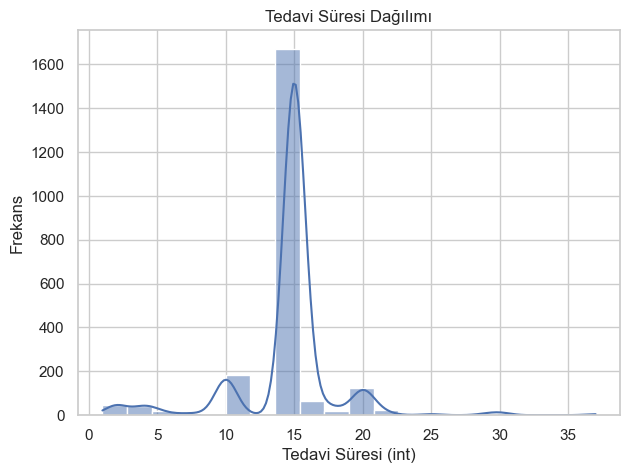

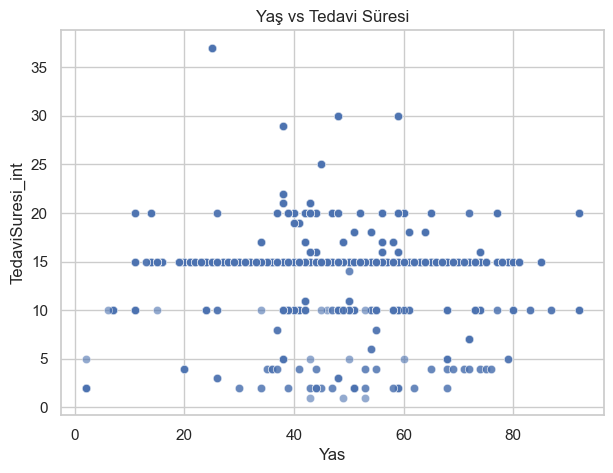

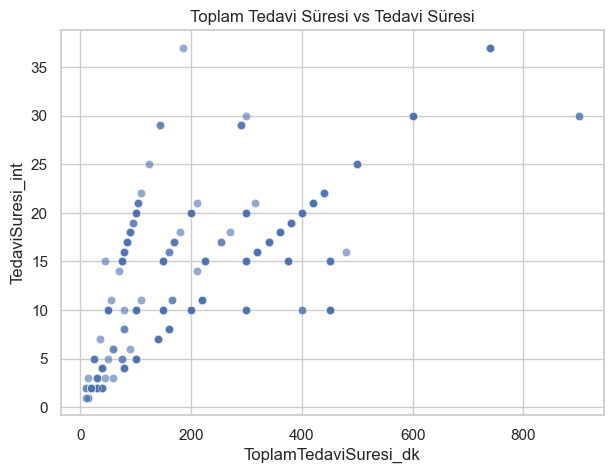

/var/folders/1j/l39f_yc13vd6rqvpf02d2tqc0000gn/T/ipykernel_39969/1884058050.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr, y=target_corr.index, palette="coolwarm")


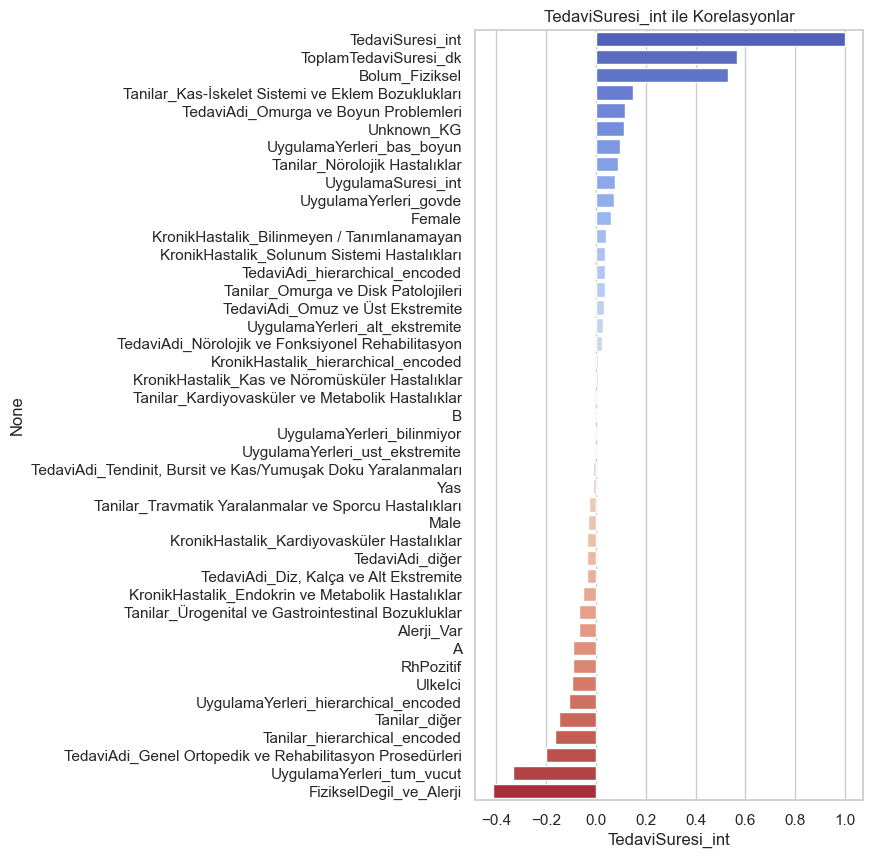

In [656]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = dt.copy()
df_clean = df_clean.astype({col: "int" for col in df_clean.select_dtypes("bool").columns})

plt.figure(figsize=(7,5))
sns.histplot(df_clean["TedaviSuresi_int"], bins=20, kde=True)
plt.title("Tedavi Süresi Dağılımı")
plt.xlabel("Tedavi Süresi (int)")
plt.ylabel("Frekans")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="Yas", y="TedaviSuresi_int", data=df_clean, alpha=0.6)
plt.title("Yaş vs Tedavi Süresi")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="ToplamTedaviSuresi_dk", y="TedaviSuresi_int", data=df_clean, alpha=0.6)
plt.title("Toplam Tedavi Süresi vs Tedavi Süresi")
plt.show()

corr = df_clean.corr()
target_corr = corr["TedaviSuresi_int"].sort_values(ascending=False)

plt.figure(figsize=(5,10))
sns.barplot(x=target_corr, y=target_corr.index, palette="coolwarm")
plt.title("TedaviSuresi_int ile Korelasyonlar")
plt.show()


bu son kısımda ise standartizasyon yapmaya çalıştım bildiğim bir iki yöntemle zaten zscore ve ıqr yöntemi en temel ve bilinen yöntemlerdir aykırı değer için burada hangi model seçilecekse ona göre bir standartizasyıon seçilebilir

Z-Score Outlier Sayısı:
 Yas                                                               0
Male                                                              0
Female                                                            0
A                                                                 0
B                                                                 0
RhPozitif                                                         0
Unknown_KG                                                        0
UlkeIci                                                          62
Alerji_Var                                                        0
Bolum_Fiziksel                                                  186
TedaviSuresi_int                                                 77
UygulamaSuresi_int                                               12
KronikHastalik_hierarchical_encoded                               0
KronikHastalik_Bilinmeyen / Tanımlanamayan                        0
KronikHastalik_Endokrin

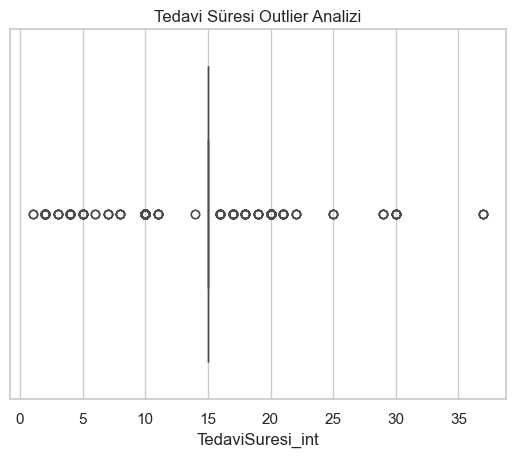

Standardize edilmiş veri örneği:
         Yas      Male    Female         A         B  RhPozitif  Unknown_KG  \
0  0.833459 -0.740849  0.868514 -0.661985 -0.439628   0.768601   -0.657794   
1 -1.271080  1.349804 -1.151392 -0.661985 -0.439628   0.768601   -0.657794   
2 -1.271080  1.349804 -1.151392 -0.661985 -0.439628   0.768601   -0.657794   
3 -1.271080  1.349804 -1.151392 -0.661985 -0.439628   0.768601   -0.657794   
4 -1.271080  1.349804 -1.151392 -0.661985 -0.439628   0.768601   -0.657794   

    UlkeIci  Alerji_Var  Bolum_Fiziksel  ...  TedaviAdi_diğer  \
0  0.168914    0.855112        0.301291  ...         1.667851   
1  0.168914   -1.169438        0.301291  ...        -0.599574   
2  0.168914   -1.169438        0.301291  ...        -0.599574   
3  0.168914   -1.169438        0.301291  ...        -0.599574   
4  0.168914   -1.169438        0.301291  ...        -0.599574   

   UygulamaYerleri_hierarchical_encoded  UygulamaYerleri_alt_ekstremite  \
0                             -

In [657]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = df_clean.select_dtypes(include=["int64"]).columns

# Z-Score yöntemi
z_scores = np.abs((df_clean[numeric_cols] - df_clean[numeric_cols].mean()) / df_clean[numeric_cols].std())
outliers_z = (z_scores > 3).sum()
print("Z-Score Outlier Sayısı:\n", outliers_z, "\n")

# IQR yöntemi
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))
outliers_iqr = outlier_mask.sum()
print("IQR Outlier Sayısı:\n", outliers_iqr, "\n")

# Boxplot (hedef değişken için)
sns.boxplot(x=df_clean["TedaviSuresi_int"])
plt.title("Tedavi Süresi Outlier Analizi")
plt.show()

# === 4. Normalizasyon / Standardizasyon ===
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

minmax = MinMaxScaler()
df_minmax = df_clean.copy()
df_minmax[numeric_cols] = minmax.fit_transform(df_clean[numeric_cols])

print("Standardize edilmiş veri örneği:\n", df_scaled.head(), "\n")
print("MinMax normalize edilmiş veri örneği:\n", df_minmax.head(), "\n")
